In [98]:
import numpy as np
import pandas as pd


In [99]:
from matplotlib import gridspec
from sklearn.metrics import classification_report



In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns



In [103]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120896,75998,1.501845,-1.193147,0.066789,-1.600847,-1.259865,-0.268558,-1.122205,0.040104,-1.795060,...,-0.226430,-0.409194,-0.074263,-0.565449,0.404350,-0.168445,0.010981,0.001626,30.00,0.0
120897,75999,-0.340455,1.201756,1.314094,0.053134,0.111616,-0.959891,0.780107,-0.128473,-0.541652,...,-0.252458,-0.609959,-0.025552,0.360654,-0.127871,0.068601,0.251848,0.100380,3.67,0.0
120898,75999,-1.089161,0.115364,1.501978,0.700866,0.493027,-0.220268,0.744468,0.128396,-0.983044,...,0.391619,0.776285,0.179390,0.218712,-0.009381,-0.353213,0.082478,0.143270,130.80,0.0
120899,76000,0.213729,0.623136,-0.259558,-0.152127,2.262088,3.579712,-0.187220,0.877580,-0.697998,...,-0.193588,-0.663299,0.088675,1.005326,-0.676412,0.251661,0.105658,0.088634,1.29,0.0


In [104]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [105]:
df.shape


(120901, 31)

In [106]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,120901.0,47495.615429,19080.462079,0.000000,35831.000000,49327.000000,63118.000000,76001.000000
V1,120901.0,-0.254384,1.836627,-56.407510,-1.023037,-0.264902,1.155820,1.960497
V2,120901.0,-0.008025,1.634281,-72.715728,-0.583732,0.089895,0.756160,18.902453
V3,120901.0,0.678328,1.290767,-33.680984,0.174366,0.752889,1.373702,9.382558
V4,120901.0,0.153237,1.335416,-5.172595,-0.706709,0.181041,1.012619,16.715537
V5,120901.0,-0.283571,1.329840,-42.147898,-0.904233,-0.315684,0.241918,34.801666
V6,120901.0,0.088069,1.291924,-26.160506,-0.654688,-0.164835,0.477487,22.529298
V7,120901.0,-0.114509,1.189611,-31.764946,-0.602159,-0.066252,0.412205,36.677268
V8,120901.0,0.060891,1.221797,-73.216718,-0.133908,0.077899,0.370624,20.007208
V9,120901.0,-0.079127,1.096136,-9.283925,-0.708076,-0.141253,0.505476,15.594995


In [107]:
df.dropna(inplace=True)


In [108]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)



In [109]:
fraud = df[df.Class == 1]
valid = df[df.Class == 0]
outlierFraction = len(fraud) / float(len(valid))
outlierFraction


0.002063803864037596

In [110]:
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')


Fraud Cases: 249
Valid Transactions: 120651


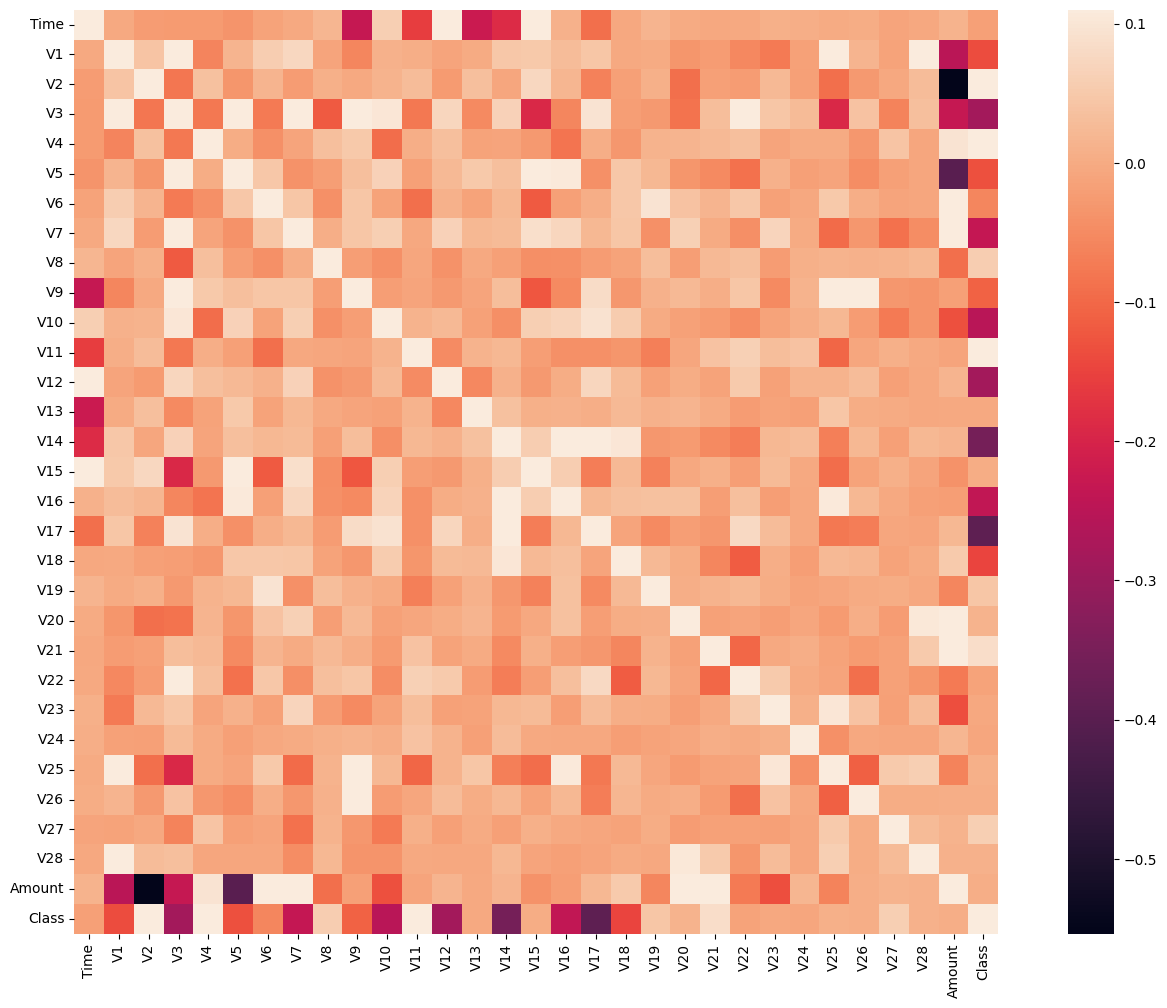

In [111]:
corrmat = df.corr()
fig = plt.figure(figsize = (18, 12))
sns.heatmap(corrmat, vmax = .11, square = True)
plt.show()


In [112]:
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)

(120900, 30)
(120900,)


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        X,Y, test_size = 0.2, random_state = 42)


In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
yPred = rfc.predict(x_test)


In [116]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.999379652605459
The precision is 1.0
The recall is 0.7368421052631579
The F1-Score is 0.8484848484848484
The Matthews correlation coefficient is0.8581283189795001


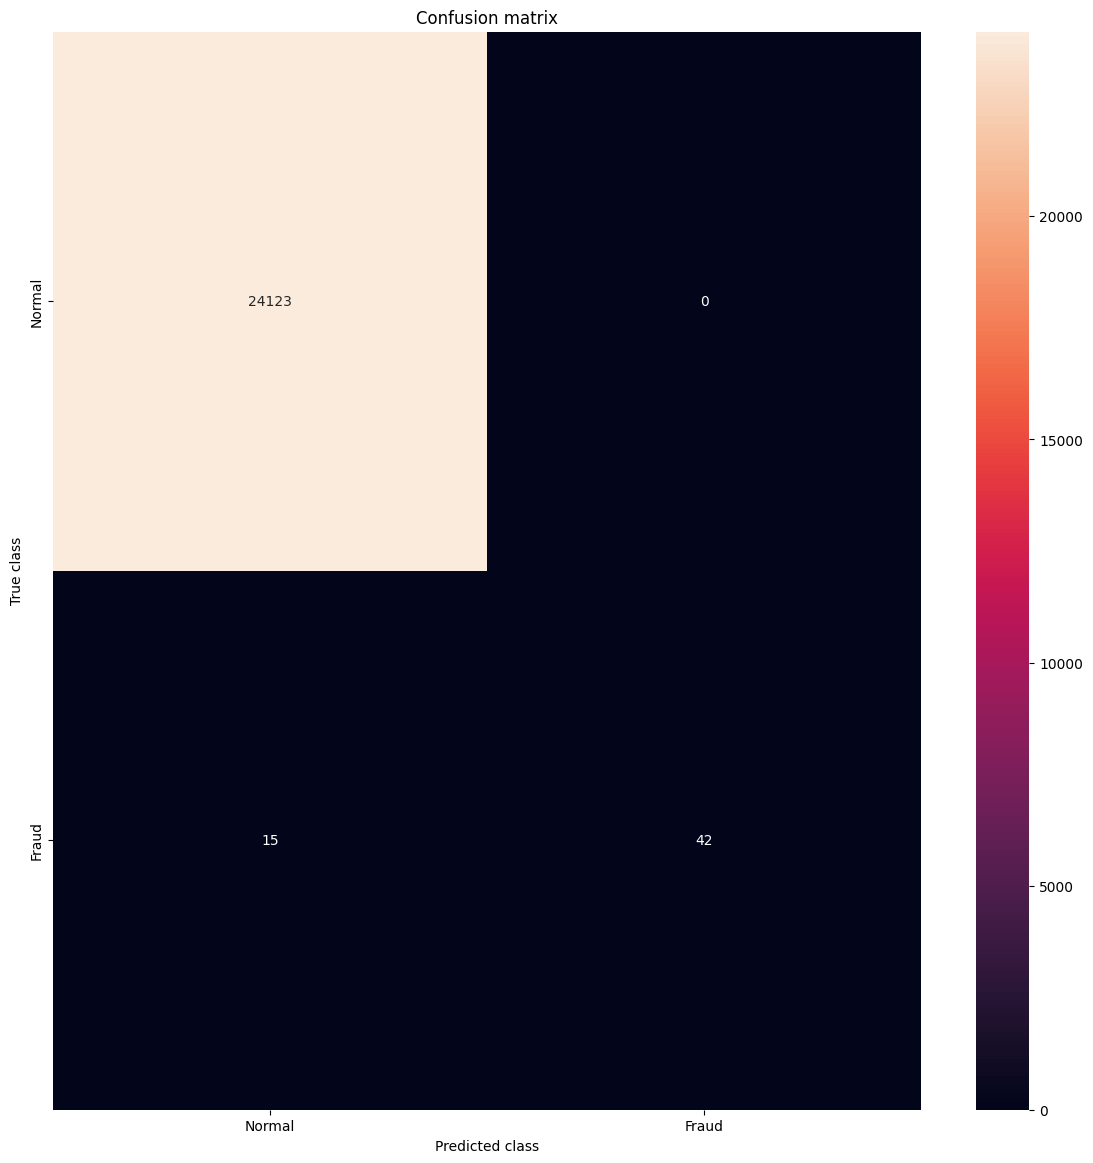

In [115]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(14, 14))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
